In [1]:
import sys
import aotools
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms
from collections import OrderedDict

sys.path.insert(0, '../')
from model_custom import Net
from load import load
from train import train
from utils import *
from dataset import *
import monitoring

In [2]:
model = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    model.to(device)
    
# Load weights
#model_dir = 'model.pth'
#state_dict = torch.load(model_dir)
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove module.
#    new_state_dict[name] = v
#model.load_state_dict(state_dict)
    
#print(model)    
    
# Test
x = torch.randn(32, 2, 128, 128)
output, _ = model(x)
print(output.shape)
print(_.shape)

torch.Size([32, 128, 128])
torch.Size([32, 20])


In [ ]:
# Data set
data_dir = '../dataset/dataset2/'
dataset_size = 100000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

#monitor = monitoring.monitoringGPU(120)
    
criterion = nn.MSELoss()
#new_params = list(model.parameters())
#new_params = new_params[:len(new_params)-6]

#optimizer = optim.Adam([
#                {'params': new_params},
#                {'params': model.module.resnet.fc.parameters(), 'lr': 1e-5}
#            ], lr=1e-5)

optimizer = optim.Adam(model.parameters(), lr=1e-5)


train(
              model, 
              dataset, 
              optimizer, 
              criterion,
              split = [0.95, 0.05],
              batch_size = 256,
              n_epochs = 250,
              random_seed = 42,
              model_dir = './',
              visdom = True,
)


#monitor.stop()

Visdom successfully connected to server
------------------------------
[1/250] train loss: 62218.750687
[1/250] val loss: 42875.192794
[1/250] Time: 83.987818 s
------------------------------
[2/250] train loss: 39729.512590
[2/250] val loss: 36836.692713
[2/250] Time: 83.581897 s
------------------------------
[3/250] train loss: 35835.646337
[3/250] val loss: 31501.954003
[3/250] Time: 84.079090 s
------------------------------
[4/250] train loss: 25028.414813
[4/250] val loss: 21128.091600
[4/250] Time: 86.573693 s
------------------------------
[5/250] train loss: 18908.067765
[5/250] val loss: 16266.999978
[5/250] Time: 85.773945 s
------------------------------
[6/250] train loss: 14879.449080
[6/250] val loss: 13837.804081
[6/250] Time: 86.369553 s
------------------------------
[7/250] train loss: 12856.623534
[7/250] val loss: 11391.396472
[7/250] Time: 87.837576 s
------------------------------
[8/250] train loss: 9567.761217
[8/250] val loss: 7724.217279
[8/250] Time: 87.285

------------------------------
[69/250] train loss: 200.992141
[69/250] val loss: 264.019839
[69/250] Time: 90.644363 s
------------------------------
[70/250] train loss: 197.525616
[70/250] val loss: 253.803495
[70/250] Time: 92.479255 s
------------------------------
[71/250] train loss: 196.758498
[71/250] val loss: 227.971731
[71/250] Time: 84.548705 s
------------------------------
[72/250] train loss: 195.382189
[72/250] val loss: 254.438119
[72/250] Time: 91.041685 s
------------------------------
[73/250] train loss: 187.793903
[73/250] val loss: 241.399890
[73/250] Time: 84.159058 s
------------------------------
[74/250] train loss: 187.787659
[74/250] val loss: 227.618441
[74/250] Time: 83.806368 s
------------------------------
[75/250] train loss: 185.370692
[75/250] val loss: 285.882483
[75/250] Time: 84.617928 s
------------------------------


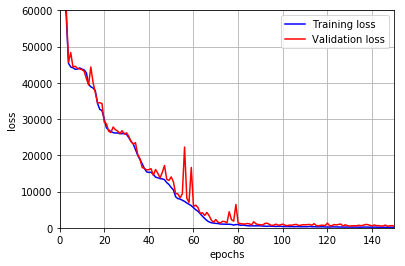

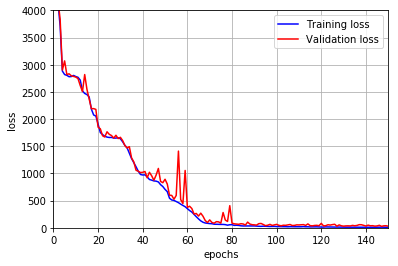

In [14]:
metrics = get_metrics(model_dir='./resnet/')
plot_learningcurve(metrics, name='./resnet/lrcurve.pdf', ylim=[0,60000], xlim=[0,150])
plot_learningcurve(metrics, zernike=True, name='./resnet/lrcurve_zernike.pdf', ylim=[0,4000], xlim=[0,150])